In [1]:
import tweepy
from twitter_secrets import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=False, wait_on_rate_limit_notify=False)

In [2]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print(status.text)

stream_listener = MyStreamListener()


class OnMemoryStreamListener(tweepy.StreamListener):
    def __init__(self, *args, **kwargs):
        
        super().__init__(*args, **kwargs)
        self.statuses = []

    def on_status(self, status):
        print(status.text)
        self.statuses.append(status)
        
stream_listener = OnMemoryStreamListener()


In [4]:
stream = tweepy.Stream(auth = api.auth, 
                       listener=stream_listener)
continue_capture = True
while continue_capture:
    try:
        print('Start streaming.')
        stream.filter(track=['fortnite', 'minecraft', 'pubg'], languages=['es', 'en'])
    except KeyboardInterrupt as e :
        print("Stopped.")
        continue_capture = False
    finally:
        print('Done.')
        stream.disconnect()

Start streaming.
RT @NYCSchools: NYC students! 🟩🟦🟥🟧 Join the @PlayCraftLearn's 2020 #MinecraftEdu Challenge to Build a Better World! 🟩🟦🟥🟧 Visit https://t.co…
RT @ImEntoYT: SORTEO

1x Pase de batalla de la temporada 3 capítulo 2 de #Fortnite

- Requisitos en la foto (si no me agregáis no os podré…
PUBG: Pacific Underweight Bookcase Glossolalia
@RoseHQs Recruit Me 👀🌹
#BewareRose #Rose10k #RoseChekz #fortnite #rose 
@RoseHQs @bababanoush https://t.co/eNDJ1Zo7F2
RT @GorditosGatitos: gatito minecraft https://t.co/Yw0olpbeaz
RT @GorditosGatitos: gatito minecraft https://t.co/Yw0olpbeaz
RT @FNPhootographer: Moxie is up to something 👀💛

Just some tests with light!

#Fortnite #FortniteArt #Blender3D #Render #FortniteGame #For…
RT @_pqppotter: harry styles as minecraft minerals; a thread https://t.co/8ziRjfeog8
#الاصنام_في_ببجي Please cancel idols and strengthen the security system of Bigji game to get rid of hackers who des… https://t.co/UHVJ0Mi73s
RT @MrKeroro10: Si Fortnite retrasa por lo de 

In [5]:
stream = tweepy.Stream(auth = api.auth, 
                       listener=stream_listener)
try:
    print('Start streaming.')
    stream.sample(languages=['es', 'en'])
except KeyboardInterrupt as e :
    print("Stopped.")
finally:
    print('Done.')
    stream.disconnect()

Start streaming.
RT @GNBZuliaOficial: En Función de Justicia Social!

Efectivos del .@GNB_ZuliaD112 atendiendo al Plan de Contingencia de distribución de Ag…
RT @SomosIncesVzla: Min. de Transporte, @HipolitoMRT2: Este miércoles 03 de junio saldrá una resolución con las normas sanitarias para el t…
RT @jeonykook: is that all you have to say? terminate our sponsor contract pls ur not answering my emails :)
RT @LidiaAc7: @Pameeeeh_ @Leticiacji @Angiefloreshn @_DennisArana Que sad 

Moría y revivía nuevamente ja,ja

BRILLANDO EN LA VOZ
RT @brianuzamakii: MY JAW DROPPED SO FAST LMAOO https://t.co/UgBxOrpYFM
RT @ChristRobbins: Voice over the police scanner last night: "Run them over."

A protester who was there says women were leading a chant in…
RT @chancetherapper: ONE bad apple spoils the bunch. And yall got SEVERAL at EVERY precinct. what if I told you the Tree they came from was…
@realDonaldTrump Not with you in office! You do not have the integrity, intelligence nor empathy to lead. No

In [9]:
#ver los datos capturados
print(len(stream_listener.statuses))
textos = [s.text for s in stream_listener.statuses]
lang = [s.lang for s in stream_listener.statuses]
print(textos)
print(lang)

300
['#الاصنام_في_ببجي @PUBGMOBILE_ARB @Arabi_PUBG @PUBG @Arabi_PUBG Why are idols added in Sanhok mapWe are Muslims and… https://t.co/G2ajW5ncZa', "RT @mochicrossing_: I'm not new to twitter but I'd love some more mutuals into any of the following🥺\n\nanimal crossing\nstardew valley\nzelda…", "@xFadePlayz @CheezPlees @notch @philIypao There's a secret Minecraft 2.0 ¯\\_(ツ)_/¯", 'RT @GorditosGatitos: gatito minecraft https://t.co/Yw0olpbeaz', 'Así se verá la nueva temporada de Fortnite!', 'Check out my broadcast from my PlayStation 4! #PS4live (Fortnite)  live at https://t.co/2WoSwLiDD8', 'o|||||o\nThe Hours of Service has begun for the stream, jump on the convoy!\nhttps://t.co/Lrn7xqSBuF\nMinecraft Dungeo… https://t.co/lFFO7a0pty', 'STREAMERS REACT TO *EVERYTHING* NEW in SEASON 2! (SO MUCH CHANGED!) FORTNITE UPDATE\nhttps://t.co/GrP20Fhqsb', 'STREAMERS REACT TO *EVERYTHING* NEW in SEASON 2! (SO MUCH CHANGED!) FORTNITE UPDATE\nhttps://t.co/0GQMeHoWY5', 'Minecraft on PS5 would actually 

In [23]:
#--seguir---
#análisis de sentimiendo de los datos obtenidos
import pandas as pd

In [24]:
df = pd.DataFrame(textos, columns=['textos'])

In [28]:
for tag in ['minecraft', 'fortnite', 'pubg']:
    df[tag] = df.textos.str.lower().str.contains(tag)


In [31]:
df.sum()

textos       Las cartas ya estan encaminadas | Fortnite de ...
minecraft                                                  744
fortnite                                                   650
pubg                                                       150
dtype: object

In [33]:
df['lang'] = lang

In [37]:
df.textos[df.lang=='en']

1       RT @OrVideos: Thinkin bout hybrid ™ from fortn...
2            @JermSansContext Jerma wanna play Minecraft?
3       RT @FNBRHQ: controller players trying to carry...
4             What do you think about fortnite right now?
5                              getting minecraft dungeons
                              ...                        
1804    RT @puppyprasanna: ok..let's settle this..\n\n...
1805    RT @iamwitman: Memes and pubg to me : https://...
1806    @dyinghearts @iRaeBandz @_Suicibe_ @luvcnnr @R...
1807    RT @WafflesFN: Self Revive in Fortnite??? http...
1808    RT @xboxuk: Victory! ✨\n\nRT + Follow @XboxUK ...
Name: textos, Length: 1585, dtype: object

In [38]:
%pip install spanish_sentiment_analysis

  Using cached spanish_sentiment_analysis-1.0.0-py3-none-any.whl (15.8 MB)
  Using cached marisa-trie-0.7.5.tar.gz (270 kB)
Processing c:\users\javi\appdata\local\pip\cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074\sklearn-0.0-py2.py3-none-any.whl
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-win_amd64.whl size=139421 sha256=40e9d0a8cece09c4cd8bad76516d74e6b67d7618d92323b21b42f108f16aaee3
  Stored in directory: c:\users\javi\appdata\local\pip\cache\wheels\01\ac\46\c838fd1aee138a8fd92ae30b04020995182eb4d99dec1e12ea
Successfully built marisa-trie
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [39]:
from classifier import SentimentClassifier

D:\WPy64-3770\python-3.7.7.amd64\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [40]:
analizador = SentimentClassifier()

In [43]:
analizador.predict(textos[0])

0.04073721614472117

In [44]:
df['sentimiento'] = df.textos.apply(analizador.predict)

In [47]:
df['sentimiento'][df.lang=='en'] = -1

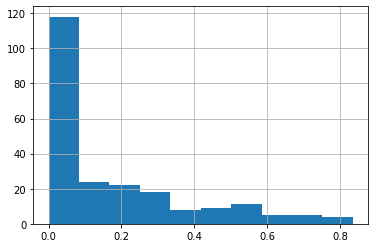

In [49]:
df['sentimiento'][df.lang=='es'].hist()

In [50]:
%pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [51]:
from textblob import TextBlob

In [54]:
blob = TextBlob(textos[10])

In [57]:
for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.45000000000000007, subjectivity=0.825)


In [59]:
blob.sentiment

Sentiment(polarity=0.45000000000000007, subjectivity=0.825)

In [60]:
def analiza_polarity(texto):
    blob = TextBlob(texto)
    return blob.polarity

In [61]:
analiza_polarity(textos[10])

0.45000000000000007

In [69]:
df['sentimiento_en'] = -1.0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   textos          1809 non-null   object 
 1   minecraft       1809 non-null   bool   
 2   fortnite        1809 non-null   bool   
 3   pubg            1809 non-null   bool   
 4   lang            1809 non-null   object 
 5   sentimiento     1809 non-null   float64
 6   sentimiento_en  1809 non-null   float64
dtypes: bool(3), float64(2), object(2)
memory usage: 62.0+ KB


In [71]:
ingles = df.lang == 'en'

In [72]:
df.sentimiento_en[ingles] = df.textos[ingles].apply(analiza_polarity)

In [73]:
df.sentimiento_en

0      -1.000000
1       0.000000
2       0.000000
3       0.000000
4       0.285714
          ...   
1804    0.000000
1805    0.000000
1806    0.000000
1807    0.000000
1808    0.450000
Name: sentimiento_en, Length: 1809, dtype: float64

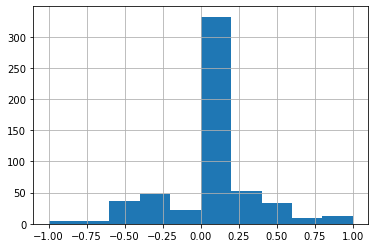

In [81]:
df.sentimiento_en[ingles & df.fortnite].hist()

In [78]:
for row in df.textos[df.sentimiento_en >0.75 ]:
    print(row)

@theta1x @NathanielleBuc1 @KnightFN_ Fortnite aint no esports lol just an e-playground for a bunch of kids
minecraft cows are the best lesbian represention we have ever had but no one talks about it
Minecraft Dungeons Best Armor – Which set should you choose? https://t.co/ZOcUCnkS3d #minecraftdungeons #esrbeveryone #Microsoft #Minecraft
This could be another reason lol https://t.co/CBY5FRek3Z
@joha7766 @kr4bby @memoirfn @Obeytheboii_11 @VimFN @UnknownxArmy1x Lol there like 100 millions k&amp;b player on fortnite
RT @DonaldMustard: So proud and humbled by the talent and dedication of the 1000+ people working, from their homes, to make Fortnite awesom…
Amelia Interrupted https://t.co/kOb5VmYHLN via @YouTube great video of her having to pause playing. #pottybreak… https://t.co/n5M6f5B1Y7
Very nice
@kekflx When is fortnite adding that as a legendary skin
RT @Code_Abe: 2800 vbuck giveaway! Retweet and follow me to win. Ends in 48 hours. GOOD LUCK!! #Fortnite #GiveAway https://t.co/gqLIymFCo

In [82]:
%pip install googletrans

Processing c:\users\javi\appdata\local\pip\cache\wheels\29\2c\06\957b5a801b311507090697dde39473f3d70154f1ca7142efa8\googletrans-2.4.0-py3-none-any.whlNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [83]:
from googletrans import Translator

In [84]:
traductor = Translator()

In [86]:
traduccion = traductor.translate(textos[0])

In [87]:
traduccion.text

'The cards are already underway | Fortnite chill | -10 FPS for ever https://t.co/8AgxfyLYgW'